<a href="https://colab.research.google.com/github/ruanraian/1adt-fase1-tech-challenge/blob/tc/fase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução
  
  O custo de serviços médicos envolvidos na precificação de serviços de seguro
  saúde e afins demanda conhecimentos multidisciplinares, inclusive em Medicina.
  
  A coleta de dados, dentro da proposta acadêmica, não foi modelada para envolver todas as características determinantes. Na verdade, trata-se de uma análise de um conjunto de dados com grandes limitações.
  
  Entretanto, será possível analisar se alguns vieses e heurísticas serão confirmados.
  
  Por exemplo, seria plausível, diante do conhecimento comum, afirmar que o serviço seria mais barato quando prestado à mulheres, sob a premissa de que cuidam mais da própria saúde em relação aos homens.
  
  Outra premissa interessante de se analisar é se o  BMI tem impacto, já que o índice de massa corporal é amplamente divulgado para classificação de obesidade e a obesidade está diretamente relacionada à síndrome metabólica.
  
  Quanto ao cigarro, o tabagismo também é outro fator que já se presume muito relevante, tendo em vista a informação amplamente divulgada, de que está relacionado com doenças cardiovasculares e câncer.
  
  Já as regiões e a quantidade de filhos não indicam, num primeiro momento, nenhuma inclinação.
  
  Filhos são apontados pela literatura científica paradoxalmente como fator de stress e contribuidor direto para maior longevidade.
  
  No que se refere às regiões,  é notório o estudo sobre as "blue zones", locais onde há grande incidência de pessoas centenárias; ao mesmo tempo em que certas regiões, açoitadas pela pobreza, pelo avanço da indústrias e seus males oriundos das mais diversas formas de poluição.

  Em suma, muitas hipóteses devem ser testadas diante do banco de dados, com objetivo final de criar o melhor modelo preditivo possível.
  

1. Carregue a base de dados
Importação de bibliotecas, carregar base de dados

In [ ]:
#!git clone https://github.com/antononcube/Python-packages.git
#import sys
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#sys.path.append('/content/Python-packages/ChernoffFace')

!pip install ChernoffFace
from ChernoffFace import chernoff_face

# Configura estilo dos gráficos
sns.set(style="whitegrid")

url = "https://drive.google.com/uc?id=1LQAAEgGHP_O50sZDjrbBE-B9AmLt_Uq_&export=download"
df = pd.read_csv(url)




Explore suas características# Nova seção

# Análise exploratória


São 6 features, entre dados do tipo inteiro, objeto, e float.
Como visto na introdução, avaliaremos cada um deles e avaliaremos, no momento adequando, se será necessário reduzir a dimensionalidade, amplia-la etc.
Felizmente, não será necessário tratar dados nulos.
Analisando os primeiros 5 valores, nota-se que o indivíduo com maior valor de charges não é fumante, não tem filhos, tem um BMI "normal", mas é o mais velho.

In [ ]:

print("Informações básicas do DataFrame:")
print(df.info())


# Verificação de valores nulos
print(df.isnull().sum())

# Exibir as primeiras linhas do DataFrame processado
print(df.head())


Informações básicas do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    

3. Analise estatísticas descritivas
Apenas resultados das features com dados do tipo inteiro ou float podem ser analisados


In [ ]:
print("\nEstatísticas descritivas:")
print(df.describe())




Estatísticas descritivas:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Vistas as importantes estatísticas descritivas, vale passar à demonstração por meio de recursos gráficos, apra melhor extração de insights.

-4. Visualize distribuições relevantes
Usaremos histogramas, boxplots, gráficos de dispersão, gráficos de barras e de pizza , além de starplot e Chernoff faces
Cada um tem sua própria finalidade e pode fornecer insights valiosos.

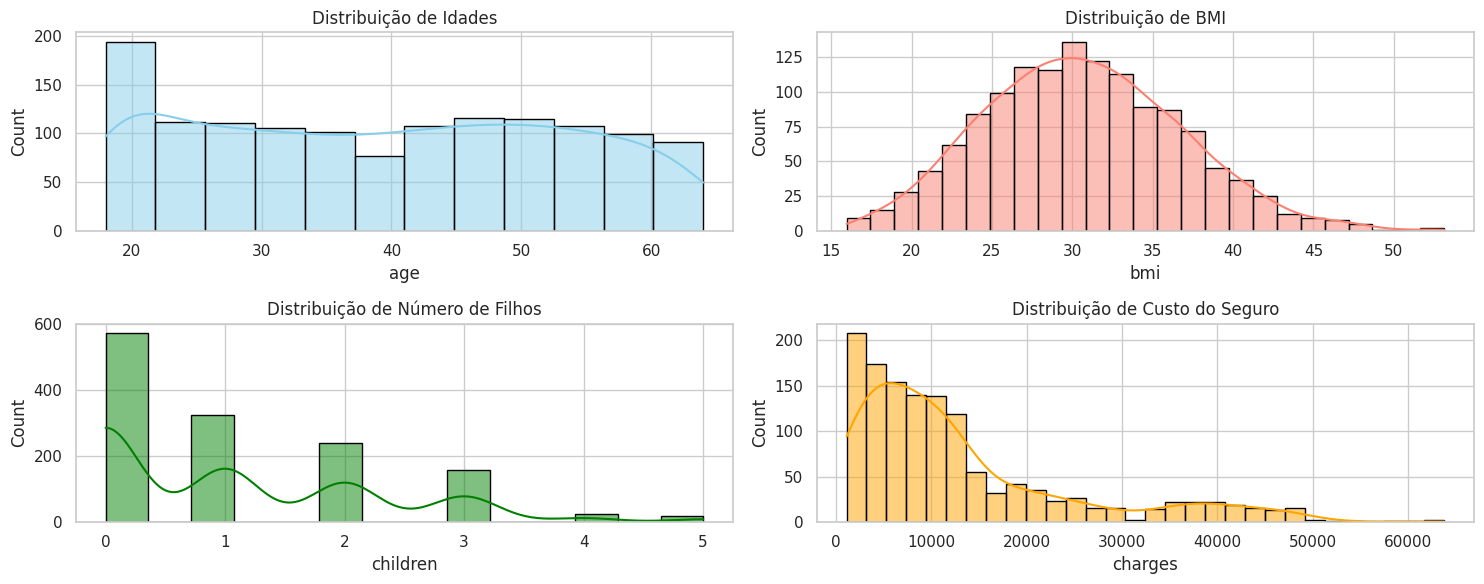

In [ ]:
#4.1.Histograma
plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True, color='skyblue', edgecolor='black')
plt.title('Distribuição de Idades')

plt.subplot(2, 2, 2)
sns.histplot(df['bmi'], kde=True, color='salmon', edgecolor='black')
plt.title('Distribuição de BMI')

plt.subplot(2, 2, 3)
sns.histplot(df['children'], kde=True, color='green', edgecolor='black')
plt.title('Distribuição de Número de Filhos')

plt.subplot(2, 2, 4)
sns.histplot(df['charges'], kde=True, color='orange', edgecolor='black')
plt.title('Distribuição de Custo do Seguro')

plt.tight_layout()
plt.show()


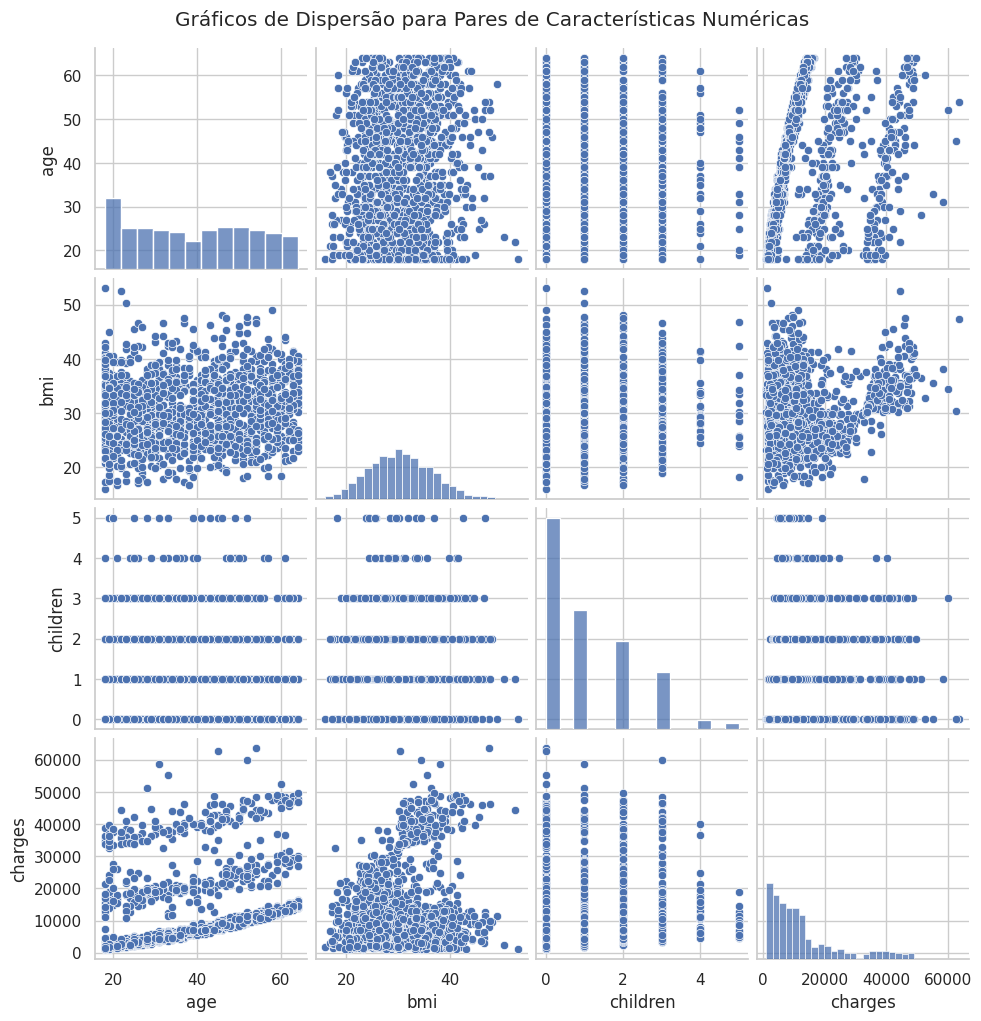

In [ ]:
#4.3.
sns.pairplot(df[['age', 'bmi', 'children', 'charges']])
plt.suptitle('Gráficos de Dispersão para Pares de Características Numéricas', y=1.02)
plt.show()

Como visto acima e já era esperado, há uma curva normal"" em termos de BMI, até porque o índice BMI foi calculado justamente sobre a incidência na população em geral (e sabemos que a obesidade é um problema atual em países desenvolvidos), trazendo um indícios de que a colheita de dados foi, de fato, realizada aleatoriamente. Da mesma maneira, a quantidade de filhos demonstra uma tendência atual, de ter menos filhos.

Ocorre que, no que se refere às idades, uma maior quantidade de indivíduos na faixa dos 20 anos pode impactar significativamente no modelo construído.

Pode ser que indivíduos menores de 18 anos tenham sido incluídos neste segmento, entretanto o desbalanceamento pode prejudicar o modelo quando for rodar em produção. Será avaliado se é o caso de reduzir aleatoriamente o número de valores nesta classe, mas a a técnica de undersampling pode resultar na perda de informações valiosas.Também seria possível uma combinação de subamostragem nas classes majoritárias e sobreamostragem nas minoritárias, um ajuste no peso da classe (class_weight), então já valer a escolha de um modelo que permita isto: o Random Forest.



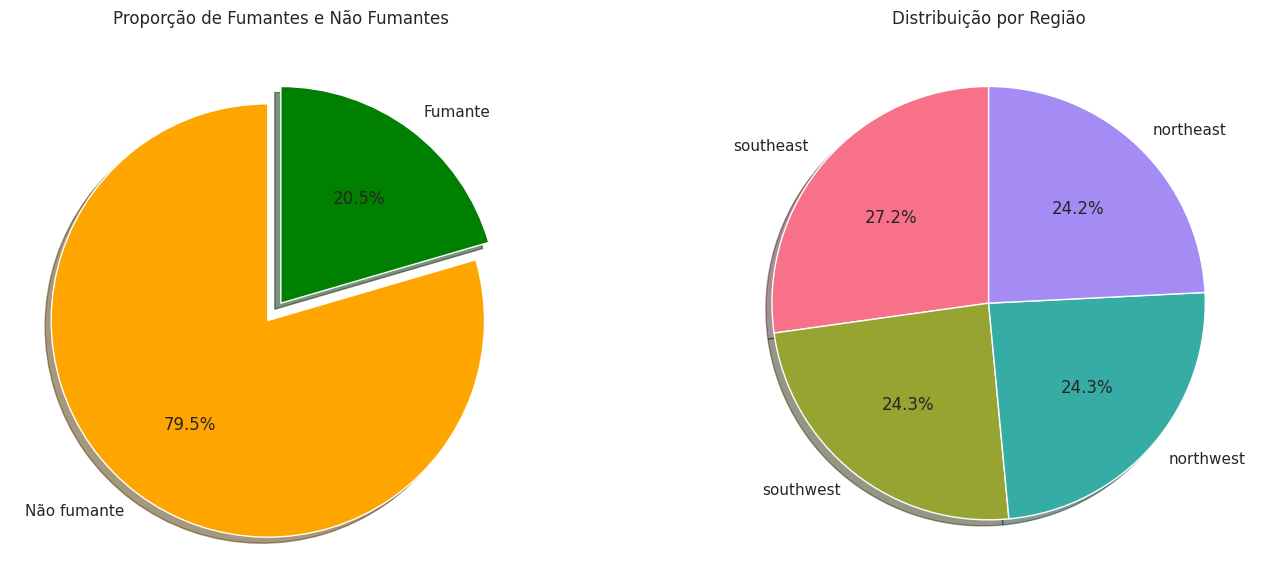

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
labels = ['Não fumante', 'Fumante']
sizes = [len(df[df['smoker'] == 'no']), len(df[df['smoker'] == 'yes'])]
colors = ['orange', 'green']
explode = [0.1, 0]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90, explode=explode)
plt.title('Proporção de Fumantes e Não Fumantes')

plt.subplot(1, 2, 2)
labels = df['region'].value_counts().index.to_list()
sizes = df['region'].value_counts().values.tolist()
colors = sns.color_palette('husl', len(labels))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Distribuição por Região')

plt.tight_layout()
plt.show()


Os dados distribuídos entre as regiões encontram-se equilibrados.

Por outro lado, como já era de se esperar, ante a diminuição de fumantes e a noção geral de que o custo para quem fuma será maior, com consequente possibilidade de mentira e dados falsos oriundos de autodeclaração em desconformidade com a realidade.

Independentemente da razão da menor quantidade de fumantes, caso se mostre, realmente, uma feature relevantes, esses dados desbalanceados podem prejudicar o desempelho do modelo.

Vamos testar aproveitar para analisar essa característica em relação à charges.

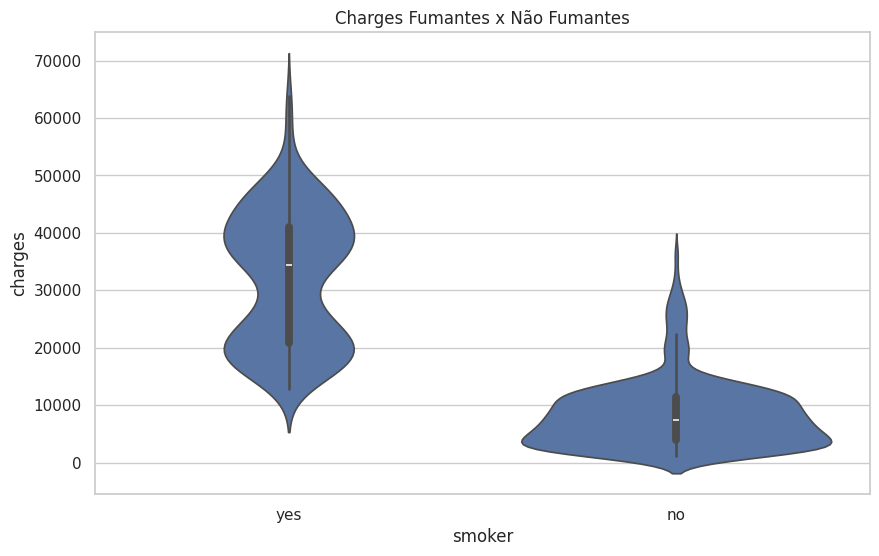

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='smoker', y='charges', data=df)
plt.title('Charges Fumantes x Não Fumantes')
plt.show()


Já restou evidente que fumantes pagam mais pelos serviços.

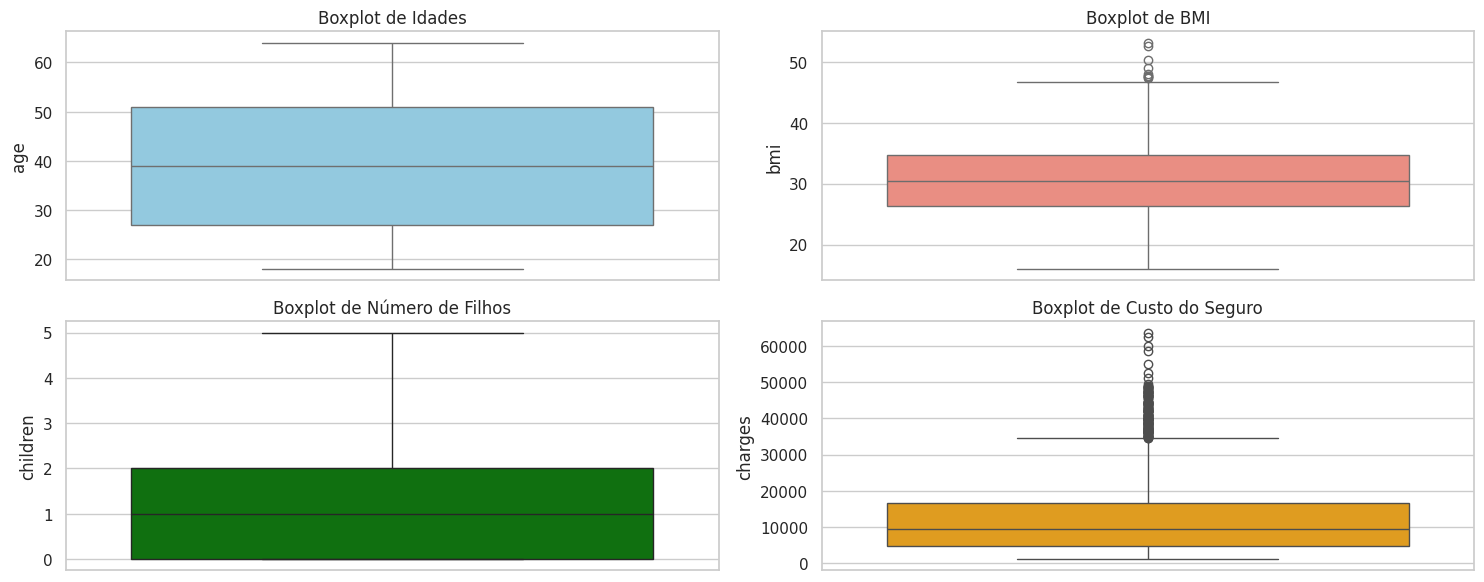

In [ ]:
# 4.2.
plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
sns.boxplot(y='age', data=df, color='skyblue')
plt.title('Boxplot de Idades')

plt.subplot(2, 2, 2)
sns.boxplot(y='bmi', data=df, color='salmon')
plt.title('Boxplot de BMI')

plt.subplot(2, 2, 3)
sns.boxplot(y='children', data=df, color='green')
plt.title('Boxplot de Número de Filhos')

plt.subplot(2, 2, 4)
sns.boxplot(y='charges', data=df, color='orange')
plt.title('Boxplot de Custo do Seguro')

plt.tight_layout()
plt.show()

Boxplots trabalham com a mediana e a distribuição de dados entre os quartis, além de apontarem outliers.

Quanto aos filhos, nenhum insight.

Sobre os custos do seguro, há uma grande quantidade de outliers, que podem prejudicar certos modelos.

Em termo de BMI, há muitos outliers também e cerca de 75% das pessoas estão com sobrepeso ou obesas. De acordo com os especialistas, indivíduos com índice entre 18,5 e 24,9 têm peso normal. Uma pessoa está acima do peso quando seu IMC atinge 25. E indivíduos com IMC a partir de 30 são classificados obesos. Isto pode contribuir para uma conclusão falsa, de que o BMI não é relevante para predição do valor de charge, pois pode ser que indivíduos com sobrepeso ou obesidade, independentemente do grau, sejam cobrados em valor superior aos indivíduos "saudáveis", mas não sejam cobrados de maneira diferente entre eles. No "mundo real", é pouco provável que o BMI não seja levando em consideração.


Não esqueçamos de analisar a colheita de dados por gênero.

<ipython-input-22-abfe9418b2ae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='pastel')


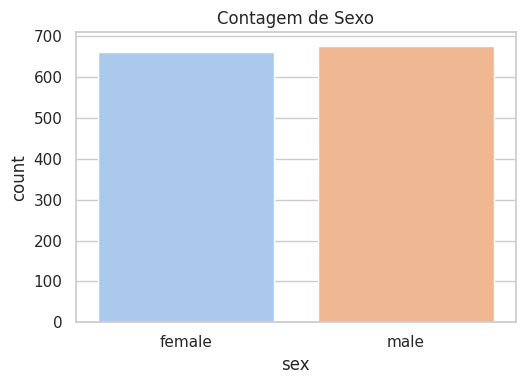

In [ ]:
#4.4.
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='sex', data=df, palette='pastel')
plt.title('Contagem de Sexo')

plt.tight_layout()
plt.show()

Parece que houve um cuidado de colher dados entre indíviduos dos gêneros masculino e feminino de maneira equilibrada.

Agora, vamos analisar a correlação entre as variáveis.

               age       sex       bmi  children    smoker   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000  0.787251
charges   0.299008  0.057292  0.198341  0.067998  0.787251  1.000000


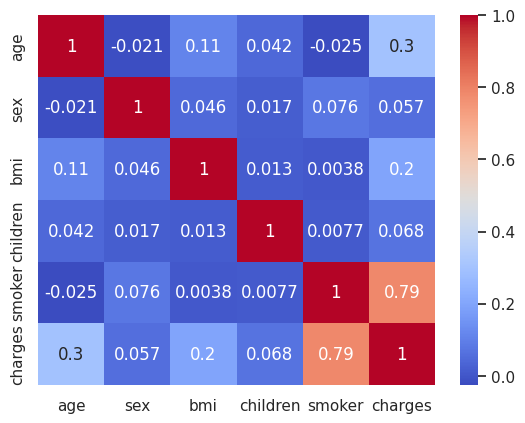

In [ ]:

import matplotlib.pyplot as plt

# Calcula  matriz de correlação
corr = df.corr()

print(corr)

# Plota gráfico
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


Não há razão para se manter a região, já que ela não pareceu ser um componente relevante neste dataset, servindo apenas para afirmar que houve uma colheita de dados equilibrada pelas diferentes regiões.

Contraituivamente, a idade e o BMI têm baixa correlação com charges, mas, como já destacado, isto pode se dar pelo desequlíbrio dos dados nessas classes.

Por outro lado, smoker, de fato, tem alta correlação com charges. Children tem um nível significativo de correlação também.

Apesar de correlação ser diferente de causalidade, não estamos estudando relações de causa e efeito, mas sim o melhor modelo preditivo para o case proposto.

Ao invés de remover age e bmi, vale a pena aplicar a técnica de undersampling; removendo apenas região.

# Pré-processamento de dados; Limpeza de dados; Convesão de variáveis categóricas

In [ ]:
df.drop('region', axis=1, inplace=True)
print(df)

      age  sex     bmi  children  smoker      charges
0      19    0  27.900         0       1  16884.92400
1      18    1  33.770         1       0   1725.55230
2      28    1  33.000         3       0   4449.46200
3      33    1  22.705         0       0  21984.47061
4      32    1  28.880         0       0   3866.85520
...   ...  ...     ...       ...     ...          ...
1333   50    1  30.970         3       0  10600.54830
1334   18    0  31.920         0       0   2205.98080
1335   18    0  36.850         0       0   1629.83350
1336   21    0  25.800         0       0   2007.94500
1337   61    0  29.070         0       1  29141.36030

[1338 rows x 6 columns]


Feita a primeira alteração relevante, de exclusão, deixou de ser necessário tratar a conversão desta variáveis categórica;  feature smoker ainda está "booleana", podendo e devendo ser convertida para um modelo binário.

Ao tentar mexer em na idade, o modelo piorou o desempenho em 5%. Código abaixo como histórico apenas

import random
indices_jovens = df[df['age'] <= 22].index.tolist()
indices_jovens_selecionados = random.sample(indices_jovens, len(indices_jovens) // 2)
df = df.drop(indices_jovens_selecionados)
plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True, color='skyblue', edgecolor='black')
plt.title('Distribuição de Idades')

In [ ]:

# Converter 'smoker' para numérico: 'no' = 0, 'yes' = 1
label_encoder = LabelEncoder()
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['sex'] = label_encoder.fit_transform(df['sex'])
print(df)

      age  sex     bmi  children  smoker     region      charges
0      19    0  27.900         0       1  southwest  16884.92400
1      18    1  33.770         1       0  southeast   1725.55230
2      28    1  33.000         3       0  southeast   4449.46200
3      33    1  22.705         0       0  northwest  21984.47061
4      32    1  28.880         0       0  northwest   3866.85520
...   ...  ...     ...       ...     ...        ...          ...
1333   50    1  30.970         3       0  northwest  10600.54830
1334   18    0  31.920         0       0  northeast   2205.98080
1335   18    0  36.850         0       0  southeast   1629.83350
1336   21    0  25.800         0       0  southwest   2007.94500
1337   61    0  29.070         0       1  northwest  29141.36030

[1338 rows x 7 columns]


In [ ]:
# Normalizar os dados
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['age', 'bmi', 'children', 'smoker', 'sex', 'charges']])
df_scaled_df = pd.DataFrame(df_scaled, columns=['age', 'bmi', 'children', 'smoker', 'sex', 'charges'])


Pelos starplots, o insight é: se a pessoa é fumante, a probabilidade de o custo ser alto é maior; no caso de não fumantes, o custo tem alta probabilidade de ser baixo em relação aos fumantes, independentemente de outras features

In [ ]:
# Eliminar regiões
df = df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']]


# Exibe as primeiras linhas do DataFrame processado para verificação
print(df.head())

#Modelagem; Modelo de regressão; Divisão do conjunto de dados em treinamento e teste


In [ ]:
# Definir a variável alvo e características
X = df_scaled_df.drop('charges', axis=1)
y = df_scaled_df['charges']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurar o modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)



#Treinamento e avaliação do modelo

In [ ]:
# Treinar o modelo
model.fit(X_train, y_train)

# Predições no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


#Validação estatística

In [ ]:

from sklearn.utils import resample

# Treinar o modelo
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Bootstrapping para intervalos de confiança
errors = y_test - predictions
alpha = 0.05  # 95% de confiança
lower_percentile = 100 * alpha/2
upper_percentile = 100 * (1 - alpha/2)
lower = np.percentile(errors, lower_percentile)
upper = np.percentile(errors, upper_percentile)

print(f"95% intervalo de confiança para os erros de previsão: [{lower:.2f}, {upper:.2f}]")

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor

# Definir o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Configurar a validação cruzada de k-folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Aplicar a validação cruzada
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Calcular média e desvio padrão dos scores
cv_mse = -cv_scores
mean_cv_mse = np.mean(cv_mse)
std_cv_mse = np.std(cv_mse)

print(f"Mean CV MSE: {mean_cv_mse}")
print(f"Standard Deviation of CV MSE: {std_cv_mse}")

In [ ]:
from sklearn.metrics import mean_squared_error

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Calcular resíduos
residuals = y_test - y_pred

# Plotar resíduos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Verificar a distribuição dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()


# Starplot e Chernoff Faces


In [ ]:

#https://pypi.org/project/ChernoffFace/
##cada face representa uma linha, de um array
from ChernoffFace import *
import numpy
import matplotlib.cm as cm
# Selecionar 12 amostras de fumantes e 50 de não fumantes
smokers_data = df_scaled_df[df_scaled_df['smoker'] == 1].sample(n=12, random_state=1)
non_smokers_data = df_scaled_df[df_scaled_df['smoker'] == 0].sample(n=12, random_state=1)

# Configuração para a visualização das faces de Chernoff para fumantes
fig_smokers = chernoff_face(data=smokers_data,
                            n_columns=5,
                            make_symmetric=True,
                            color_mapper=cm.viridis,
                            long_face=False,
                            figsize=(8, 4),
                            dpi=200)

# Configuração para a visualização das faces de Chernoff para não fumantes
fig_non_smokers = chernoff_face(data=non_smokers_data,
                                n_columns=5,
                                make_symmetric=True,
                                color_mapper=cm.viridis,
                                long_face=False,
                                figsize=(8, 4),
                                dpi=200)

# Exibir Chernoff faces
plt.figure(figsize=(10, 5))
plt.imshow(fig_smokers)
plt.axis('off')  # Esconder os eixos




É possível verificar que o formato das sobrancelhas, tamanho dos olhos, a largura da cabeça, o tamanho da testa, a cor da boca e a cor da face representam as features.

São 12 samples de fumantes e 12 samples de não fumantes.

É possível ver que 12 samples possuem olhos grandes e 12 samples olhos pequenos, indiciando que os olhos representam as charges, maiores em fumantes, como já visto.

Entretanto, quanto às demais features,  as faces não revelam mais nenhuma padrão.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


non_smokers = df_scaled_df[df_scaled_df['smoker'] == 0].sample(n=12, random_state=1)  # 12 amostras de não fumantes
smokers = df_scaled_df[df_scaled_df['smoker'] == 1].sample(n=12, random_state=1)  # 12 amostras de fumantes
samples = pd.concat([non_smokers, smokers])

# Ângulos para as características no gráfico de estrela
num_features = len(samples.columns) - 1  # Excluindo a coluna 'smoker'
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]  # Completar o loop para o gráfico polar

# Plotar os gráficos
fig, axes = plt.subplots(nrows=4, ncols=6, subplot_kw=dict(polar=True), figsize=(20, 15))
axes = axes.flatten()  # Transformar o array de axes em 1D para facilitar a iteração

# Gerar um gráfico para cada amostra
for ax, (idx, row) in zip(axes, samples.iterrows()):
    data = row.drop('smoker').tolist() + [row.drop('smoker')[0]]  # Fechar o loop
    ax.plot(angles, data, 'o-', linewidth=2, label="Smoker" if row['smoker'] == 1 else "Non-smoker")
    ax.fill(angles, data, alpha=0.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(samples.drop('smoker', axis=1).columns)
    ax.set_title("Smoker" if row['smoker'] == 1 else "Non-smoker", pad=20)

plt.tight_layout(pad=2.0)
plt.show()

NameError: name 'df_scaled_df' is not defined

Assim como nas Chernoff Faces, as formas nas categorias fumantes e não fumantes não sugerem mais nenhuma padrão.